Import de todas las librerias necesarias.

Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios

Pandas: Manipulación estructurada de datos

Faker: Generación de datos realistas

Matplotlib: Visualización gráfica de datos

In [ ]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [3]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [4]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 1000 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

In [5]:
notas = np.where(
    np.random.rand(1000) < prob_5_7,  
    np.clip(np.random.normal(loc=6, scale=1, size=1000), 5, 7),  
    np.random.randint(1, 11, size=1000) 
)

Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 1000 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [6]:
data = {
    'DNI': np.random.randint(1000, 9999, size=1000),
    'Nombre': [f"{fake.first_name()} {fake.last_name()}" for _ in range(1000)],
    'Asignatura': np.random.choice(['Matematicas', 'Fisica', 'Programacion'], 1000),
    'Nota': notas.astype(int)  # Convertir a enteros
}

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

Añadimos encoding='utf-8-sig' para que solamente se utilicen los caracteres estandar, ya que sin ello, Faker genera nombres con tildes, por lo que en el csv aparecen mal.

Ejemplo: En vez de Menéndez, aparece MenÃ©ndez

In [7]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False, encoding='utf-8-sig')

Creamos un histograma con las notas del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de Notas") y etiquetas a los ejes (X: "Nota", Y: "Frecuencia") ty mostramos el histograma.

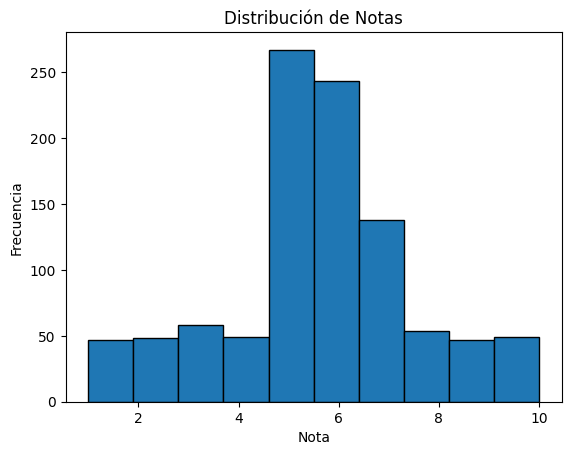

In [8]:
plt.hist(df['Nota'], bins=10, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de notas, efectivamente se sitúan entre el 5 y el 7, creando una distribución normal.

Cargamos el csv original para dividirlo en 2 archivos (alumnos  notas)

In [9]:
df = pd.read_csv('alumnos_deusto.csv', encoding='utf-8-sig')

Archivo de alumnos (sin notas)

In [10]:
df[['Nombre']].to_csv('alumnos.csv', index=False)


Archivo de notas (asignatura + nota)

In [11]:
df[['Asignatura', 'Nota']].to_csv('notas.csv', index=False)


## Limpieza

Duplicados: verificamos que no haya. En caso de haber borramos la segunda aparición y lo guardamos en otro csv.

In [12]:
duplicados = df[df["DNI"].duplicated()]

In [13]:
if not duplicados.empty:
    print("Hay DNIs duplicados:")
    print(duplicados)
else:
    print("No hay DNIs duplicados.")

Hay DNIs duplicados:
      DNI                Nombre    Asignatura  Nota
139  4017      Visitación Amaya   Matematicas     7
180  7892      Severino Alberdi        Fisica     5
219  6291             Nacio Mas   Matematicas     7
282  4172  Jose Carlos Vendrell  Programacion     8
314  4954        Valentín Sainz  Programacion     5
326  1032      Maricruz Cáceres   Matematicas     6
361  6454           Vera Millán   Matematicas     7
400  1628         Alicia Quirós  Programacion     5
435  2014       Heriberto Gomez  Programacion     5
455  6764    Ildefonso Escolano  Programacion     1
466  2197           Salomé Niño        Fisica     5
471  1258  Miguel Ángel Colomer   Matematicas     5
483  7596      Primitivo Trillo        Fisica     6
485  3443        Miguel Beltran   Matematicas     5
492  4324       Trinidad Abella   Matematicas     5
512  5088       Edelmiro Marcos        Fisica     9
627  4544        Damián Bastida        Fisica     1
663  9709    Juan Luis Pellicer   Matematic

In [14]:
df_sin_duplicados = df.drop_duplicates(subset='DNI', keep='first')
df_sin_duplicados.to_csv("alumnos_deusto_sin_duplicados.csv", index=False)


In [17]:
df = pd.read_csv('alumnos_deusto_sin_duplicados.csv', encoding='utf-8-sig')

print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

df_sin_nulos = df.dropna()
print("Tamaño tras dropna:", df_sin_nulos.shape)

df_sin_nulos.to_csv("alumnos_deusto_sin_nulos.csv", index=False)

Valores nulos por columna:
DNI           0
Nombre        0
Asignatura    0
Nota          0
dtype: int64 

Tamaño tras dropna: (954, 4)


In [21]:
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')

# Estadísticas descriptivas de la nota
print("Resumen (describe):")
print(df['Nota'].describe())

# Mediana
print("\nMediana:")
print(df['Nota'].median())

# Mínimo y máximo
print("\nMínimo:")
print(df['Nota'].min())
print("Máximo:")
print(df['Nota'].max())

# Media y desviación estándar
print("\nMedia:")
print(df['Nota'].mean())
print("Desviación estándar:")
print(df['Nota'].std())

# Varianza y rango
print("\nVarianza:")
print(df['Nota'].var())
print("Rango (max-min):")
print(df['Nota'].max() - df['Nota'].min())




Resumen (describe):
count    954.000000
mean       5.617400
std        2.086118
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: Nota, dtype: float64

Mediana:
6.0

Mínimo:
1
Máximo:
10

Media:
5.617400419287212
Desviación estándar:
2.086118400811275

Varianza:
4.351889982203391
Rango (max-min):
9


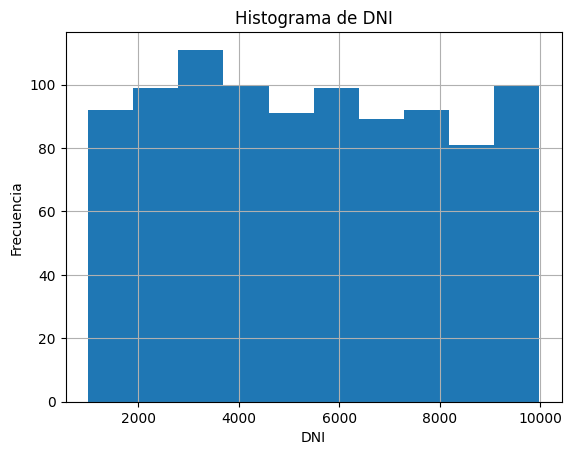

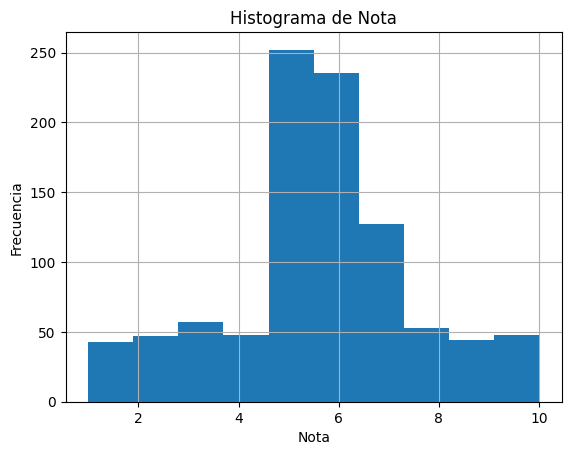

KeyError: 'horas_estudio'

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

# A) Histogramas de todas las variables numéricas
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    df[col].hist(bins=10)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# B) Scatter: ejemplo horas_estudio vs nota (ajusta nombres)
plt.figure()
plt.scatter(df['horas_estudio'], df['Nota'])
plt.title('Horas de Estudio vs. Nota')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota')
plt.show()

# C) Boxplot de notas por asignatura
plt.figure(figsize=(8,5))
df.boxplot(column='Nota', by='asignatura', rot=45)
plt.title('Notas por Asignatura')
plt.suptitle('')
plt.xlabel('Asignatura')
plt.ylabel('Nota')
plt.show()

# D) Matriz de correlación y heatmap
import numpy as np
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Matriz de Correlación')
plt.show()
